<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-04-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [143]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative', 'totalTestResults']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative,totalTestResults
37,NY,321192,707707,1028899
34,NJ,130593,157030,287623
21,MA,70271,263078,333349
16,IL,65962,280324,346286
5,CA,56212,723690,779902
41,PA,50957,199925,250882
24,MI,44397,178439,222836
10,FL,37439,428252,465691
47,TX,33369,393841,427210
7,CT,30621,78022,108643


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='GA'].groupby(['date'])

dfUSAPos = gbUSA[['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']].sum().reset_index().copy()
dfCAPos = gbCA[['positive', 'totalTestResults', 'death','positiveIncrease', 'deathIncrease']].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [145]:
dfUSAPos[-14:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
91,2020-04-22,831370,4502303,42508,28565.0,2037.0,0.695355
92,2020-04-23,862746,4694126,44385,31376.0,1877.0,0.721598
93,2020-04-24,896894,4925981,46251,34148.0,1866.0,0.750159
94,2020-04-25,932846,5197253,48069,35952.0,1818.0,0.780229
95,2020-04-26,959861,5403655,49164,27015.0,1095.0,0.802825
96,2020-04-27,981760,5594121,50327,21899.0,1163.0,0.821141
97,2020-04-28,1005789,5795925,52525,24029.0,2198.0,0.841239
98,2020-04-29,1033157,6026170,55225,27368.0,2700.0,0.864129
99,2020-04-30,1062503,6255769,57320,29346.0,2095.0,0.888674
100,2020-05-01,1095681,6551810,59059,33178.0,1739.0,0.916424


In [146]:
dfCAPos[-28:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
35,2020-04-08,9901,38787,362,1083.0,33.0,0.333244
36,2020-04-09,10566,41085,379,665.0,17.0,0.355626
37,2020-04-10,11483,46147,416,917.0,37.0,0.386490
38,2020-04-11,12159,51715,428,676.0,12.0,0.409242
39,2020-04-12,12452,54453,433,293.0,5.0,0.419104
40,2020-04-13,13315,57021,464,863.0,31.0,0.448151
41,2020-04-14,14223,61795,501,908.0,37.0,0.478712
42,2020-04-15,14987,64090,552,764.0,51.0,0.504426
43,2020-04-16,15669,67939,587,682.0,35.0,0.527380
44,2020-04-17,17194,71684,650,1525.0,63.0,0.578708


In [147]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-01,1095681,5456129,1639,52370.0,121748.0,9205.0,4300.0,4707.0,376.0,164015.0,59059,121748.0,6553449,6551810,6551810,1739.0,9761.0,262863.0,33178.0,296041.0
2020-05-02,1125719,5679522,1578,51734.0,123860.0,9403.0,4386.0,4845.0,375.0,175382.0,60710,123860.0,6806819,6805241,6805241,1651.0,2112.0,223393.0,30038.0,253431.0
2020-05-03,1152006,5901360,2812,50312.0,125796.0,9292.0,4502.0,4761.0,425.0,180152.0,61868,125796.0,7056178,7053366,7053366,1158.0,1936.0,221838.0,26287.0,248125.0
2020-05-04,1173257,6111921,2791,50062.0,127397.0,9366.0,4579.0,4848.0,430.0,187180.0,62780,127397.0,7287969,7285178,7285178,912.0,1601.0,210561.0,21251.0,231812.0
2020-05-05,1195605,6348723,2633,50906.0,129357.0,9348.0,4794.0,4818.0,439.0,189791.0,65307,129357.0,7546961,7544328,7544328,2527.0,1960.0,236802.0,22348.0,259150.0


In [148]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-01,27270,141097,0,0.0,5269.0,0.0,1215.0,0.0,0.0,0.0,1154,5269.0,168367,168367,168367,34.0,113.0,18208.0,1115.0,19323.0
2020-05-02,28306,146494,0,0.0,5387.0,0.0,1247.0,0.0,0.0,0.0,1174,5387.0,174800,174800,174800,20.0,118.0,5397.0,1036.0,6433.0
2020-05-03,28602,146494,0,0.0,5393.0,0.0,1249.0,0.0,0.0,0.0,1177,5393.0,175096,175096,175096,3.0,6.0,0.0,296.0,296.0
2020-05-04,29368,153957,0,0.0,5526.0,0.0,1284.0,0.0,0.0,0.0,1222,5526.0,183325,183325,183325,45.0,133.0,7463.0,766.0,8229.0
2020-05-05,29711,171172,0,0.0,5634.0,0.0,1318.0,0.0,0.0,0.0,1288,5634.0,200883,200883,200883,66.0,108.0,17215.0,343.0,17558.0


In [149]:
rn = gbCA.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

16.193363844393595

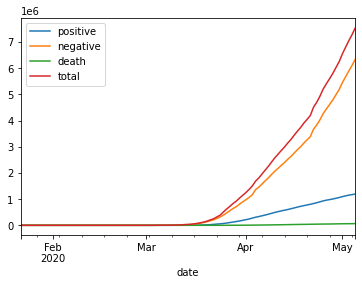

In [150]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [151]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-04-22,776907,37602
2020-04-23,800926,40073
2020-04-24,830053,42311
2020-04-25,860772,44053
2020-04-26,899281,46204
2020-04-27,931698,47980
2020-04-28,960916,49170
2020-04-29,983457,50492
2020-04-30,1003974,52428


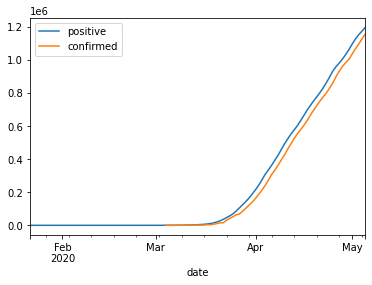

In [152]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [153]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-29,25572,118367,0,0.0,5056.0,0.0,1148.0,0.0,0.0,0.0,1093,5056.0,143939,143939,143939,67.0,242.0,2962.0,957.0,3919.0
2020-04-30,26155,122889,0,0.0,5156.0,0.0,1171.0,0.0,0.0,0.0,1120,5156.0,149044,149044,149044,27.0,100.0,4522.0,583.0,5105.0
2020-05-01,27270,141097,0,0.0,5269.0,0.0,1215.0,0.0,0.0,0.0,1154,5269.0,168367,168367,168367,34.0,113.0,18208.0,1115.0,19323.0
2020-05-02,28306,146494,0,0.0,5387.0,0.0,1247.0,0.0,0.0,0.0,1174,5387.0,174800,174800,174800,20.0,118.0,5397.0,1036.0,6433.0
2020-05-03,28602,146494,0,0.0,5393.0,0.0,1249.0,0.0,0.0,0.0,1177,5393.0,175096,175096,175096,3.0,6.0,0.0,296.0,296.0
2020-05-04,29368,153957,0,0.0,5526.0,0.0,1284.0,0.0,0.0,0.0,1222,5526.0,183325,183325,183325,45.0,133.0,7463.0,766.0,8229.0
2020-05-05,29711,171172,0,0.0,5634.0,0.0,1318.0,0.0,0.0,0.0,1288,5634.0,200883,200883,200883,66.0,108.0,17215.0,343.0,17558.0


In [154]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1180375
dead           68922
dtype: int64

In [155]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    55884
dead          2278
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [157]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1180375
Spain              218011
Italy              211938
United Kingdom     191832
France             169583
Germany            166152
Russia             145268
Turkey             127659
Brazil             108620
Iran                98647
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [162]:
dfState.loc['FL'].head(7)

,date,positive,death,current_total,pct
state,,,,,
FL,2020-05-05,37439,1536,37439,1.000000
FL,2020-05-04,36897,1423,37439,0.985523
FL,2020-05-03,36078,1403,37439,0.963648
FL,2020-05-02,35463,1388,37439,0.947221
FL,2020-05-01,34728,1314,37439,0.927589
FL,2020-04-30,33690,1290,37439,0.899864
FL,2020-04-29,33193,1240,37439,0.886589


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

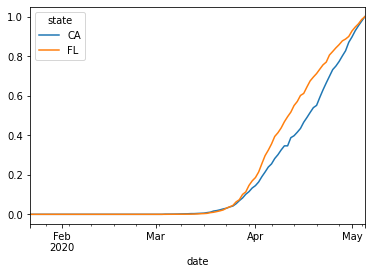

In [164]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

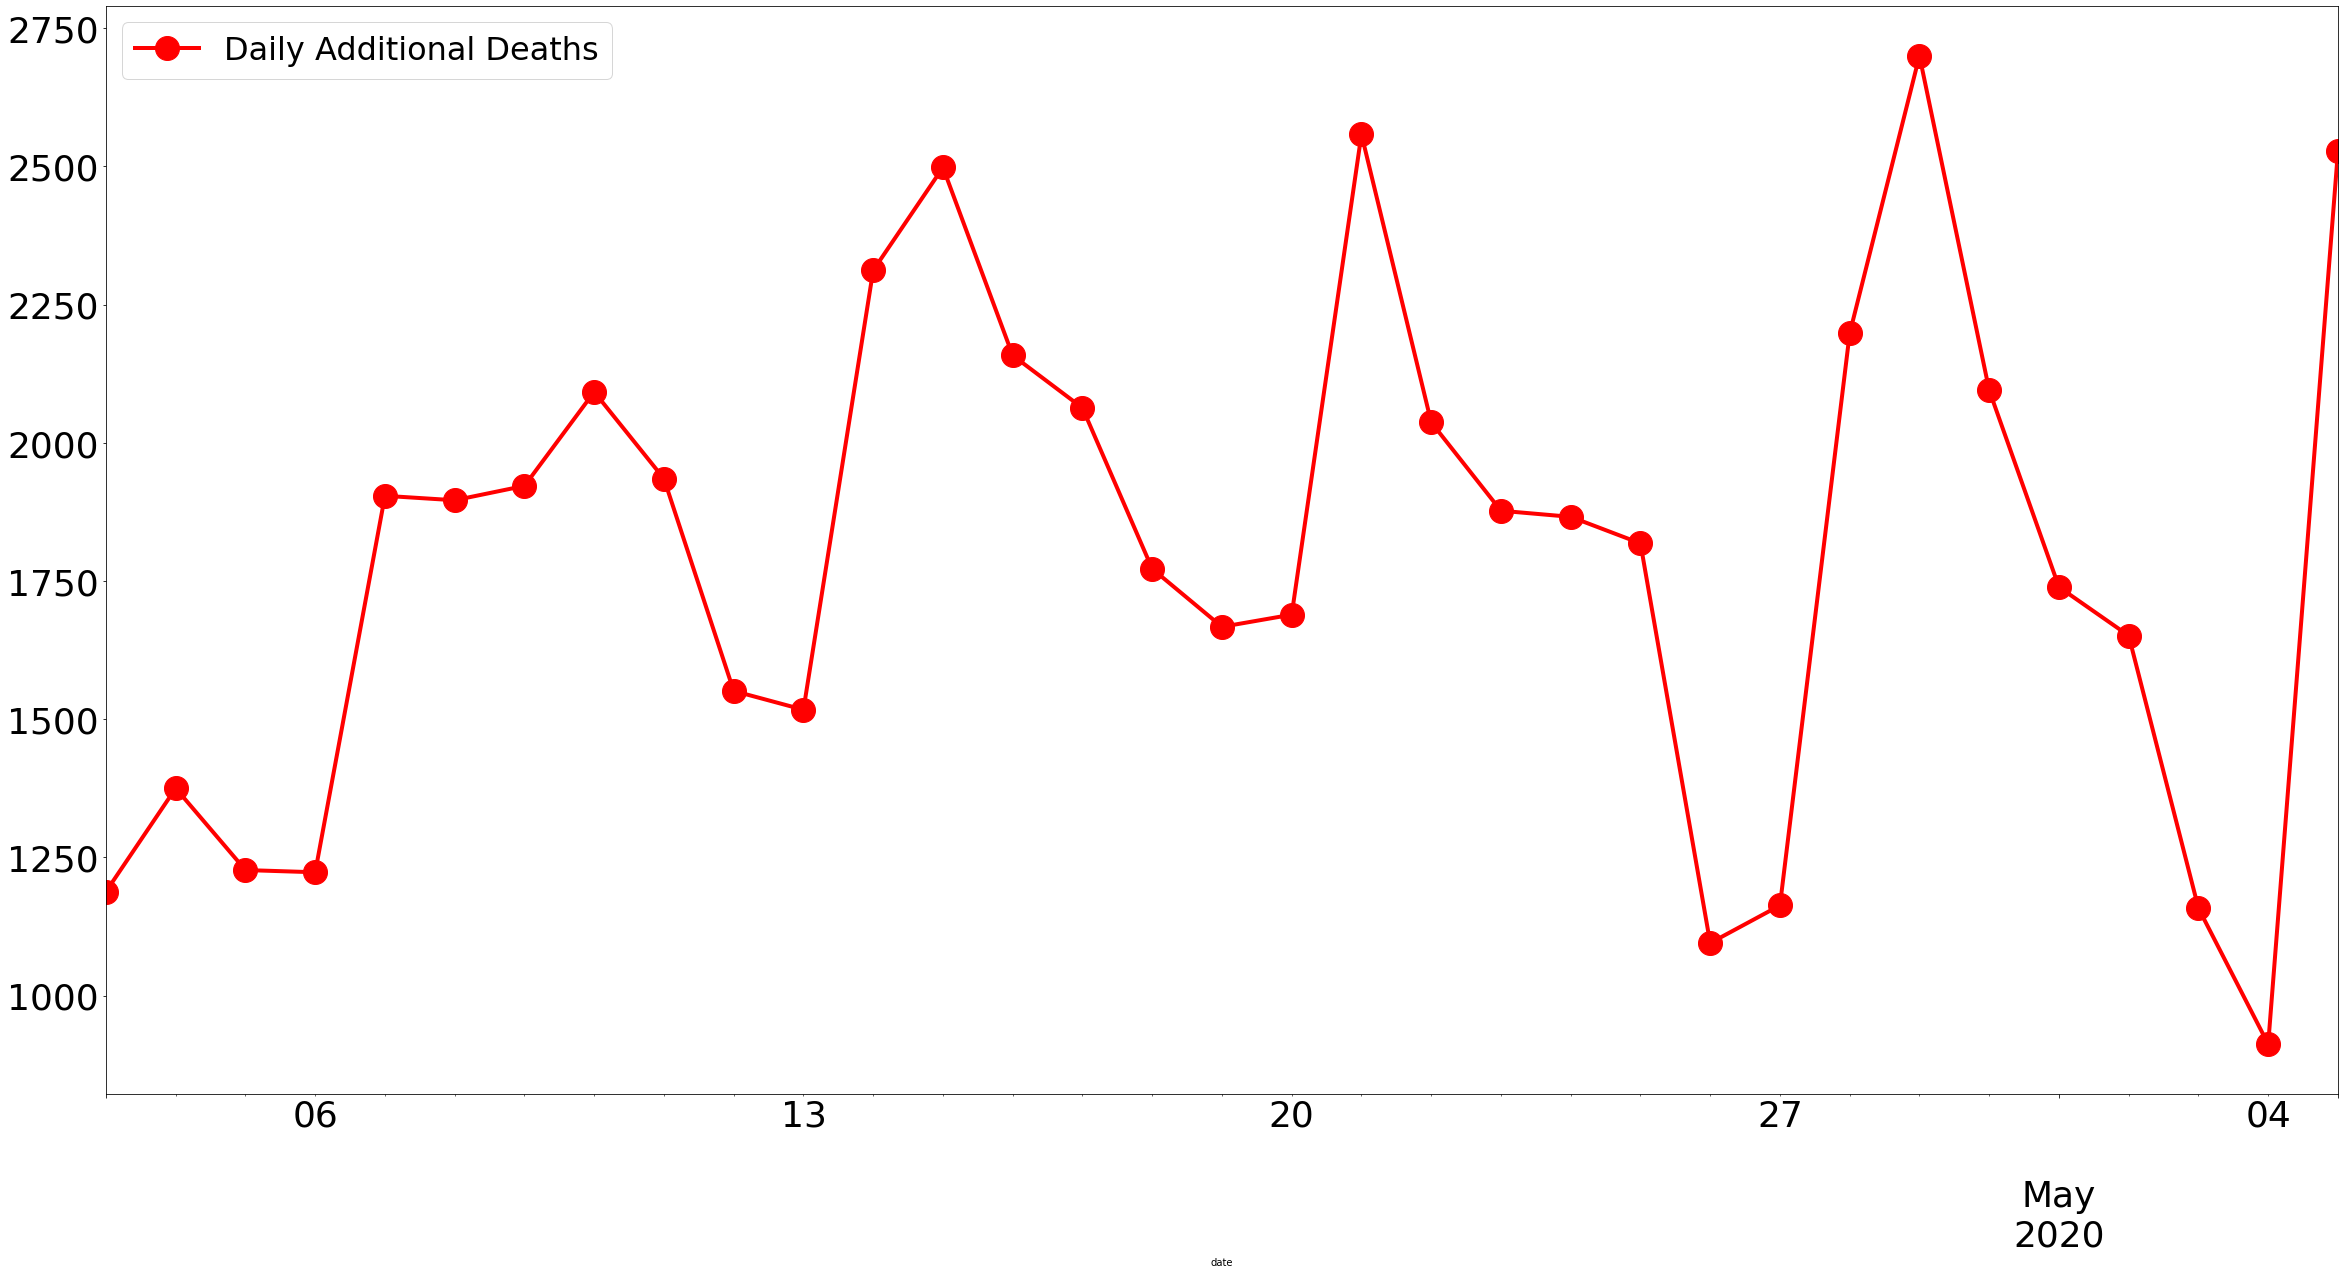

In [166]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


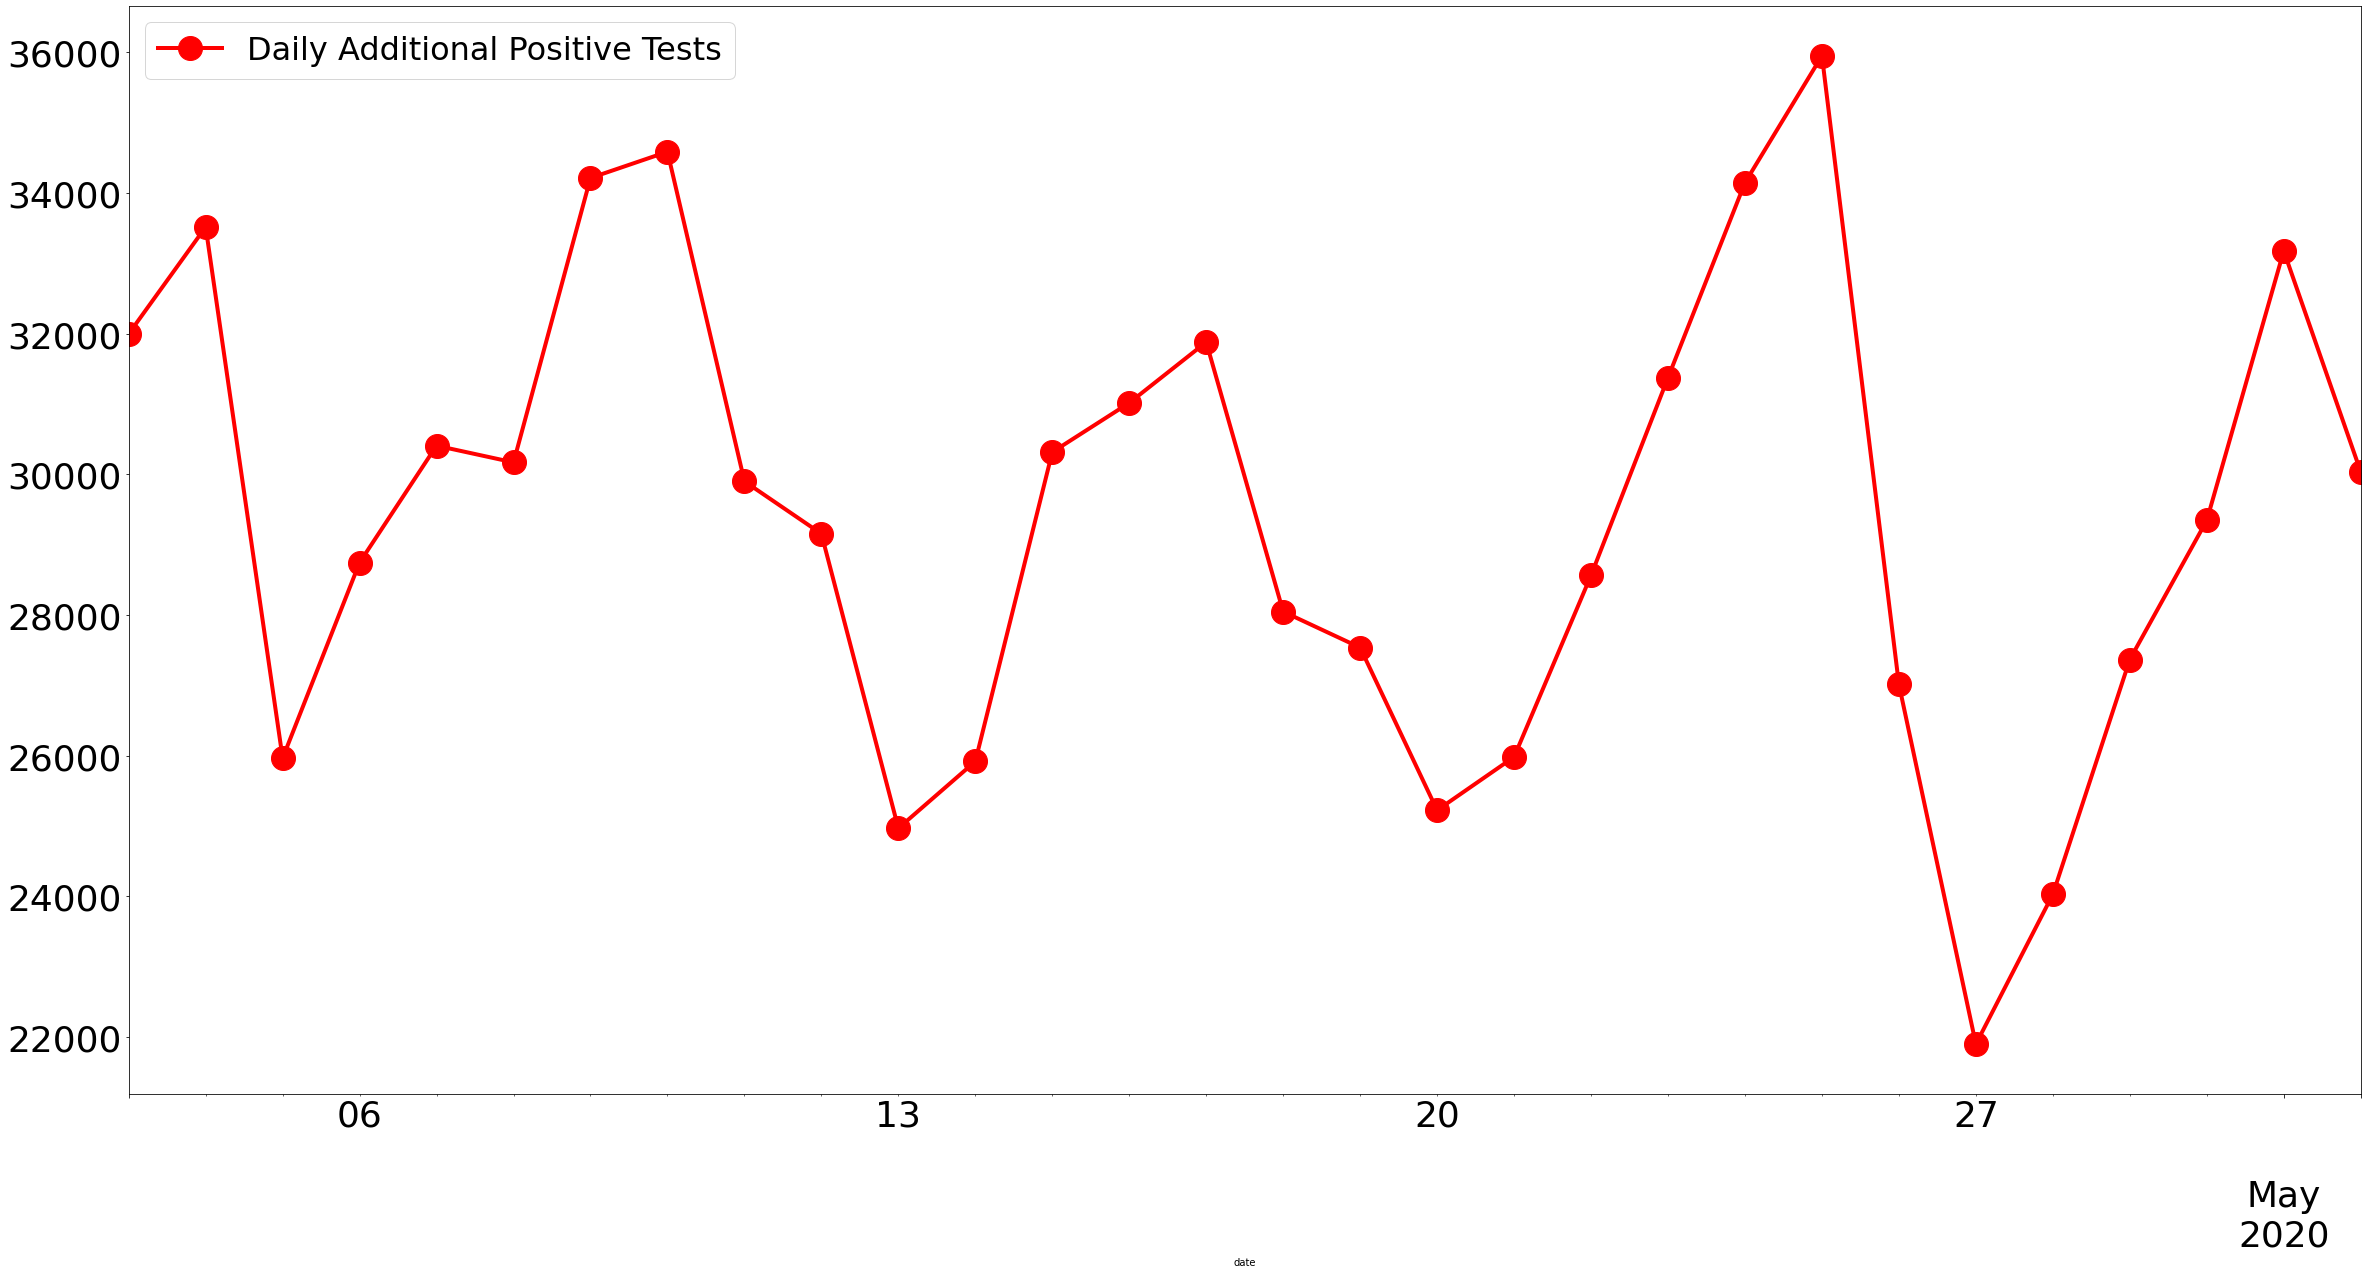

In [167]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


In [170]:
dfDoW.sum().deathIncrease



0     7150.0
1    12547.0
2    10340.0
3     9487.0
4     9397.0
5     9048.0
6     7338.0
Name: deathIncrease, dtype: float64

In [171]:
dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]


,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,
2020-05-05,0.0,0.0,968.0,1.0,969.0
2020-05-05,17.0,43.0,3389.0,260.0,3649.0
2020-05-05,-1.0,15.0,155.0,38.0,193.0
2020-05-05,0.0,0.0,0.0,0.0,0.0
2020-05-05,33.0,40.0,2621.0,386.0,3007.0
...,...,...,...,...,...
2020-01-26,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0


In [172]:
dfByWeekYear.sum()[:-1]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202004,0.0,0.0,0.0,0.0,0.0
202005,0.0,0.0,0.0,0.0,0.0
202006,0.0,0.0,0.0,1.0,1.0
202007,0.0,0.0,0.0,0.0,0.0
202008,0.0,0.0,0.0,0.0,0.0
202009,8.0,0.0,81.0,28.0,109.0
202010,23.0,0.0,2821.0,595.0,3416.0
202011,46.0,0.0,30203.0,4114.0,34317.0
202012,359.0,2498.0,179297.0,31482.0,210779.0
202013,2091.0,13766.0,497952.0,107963.0,605915.0


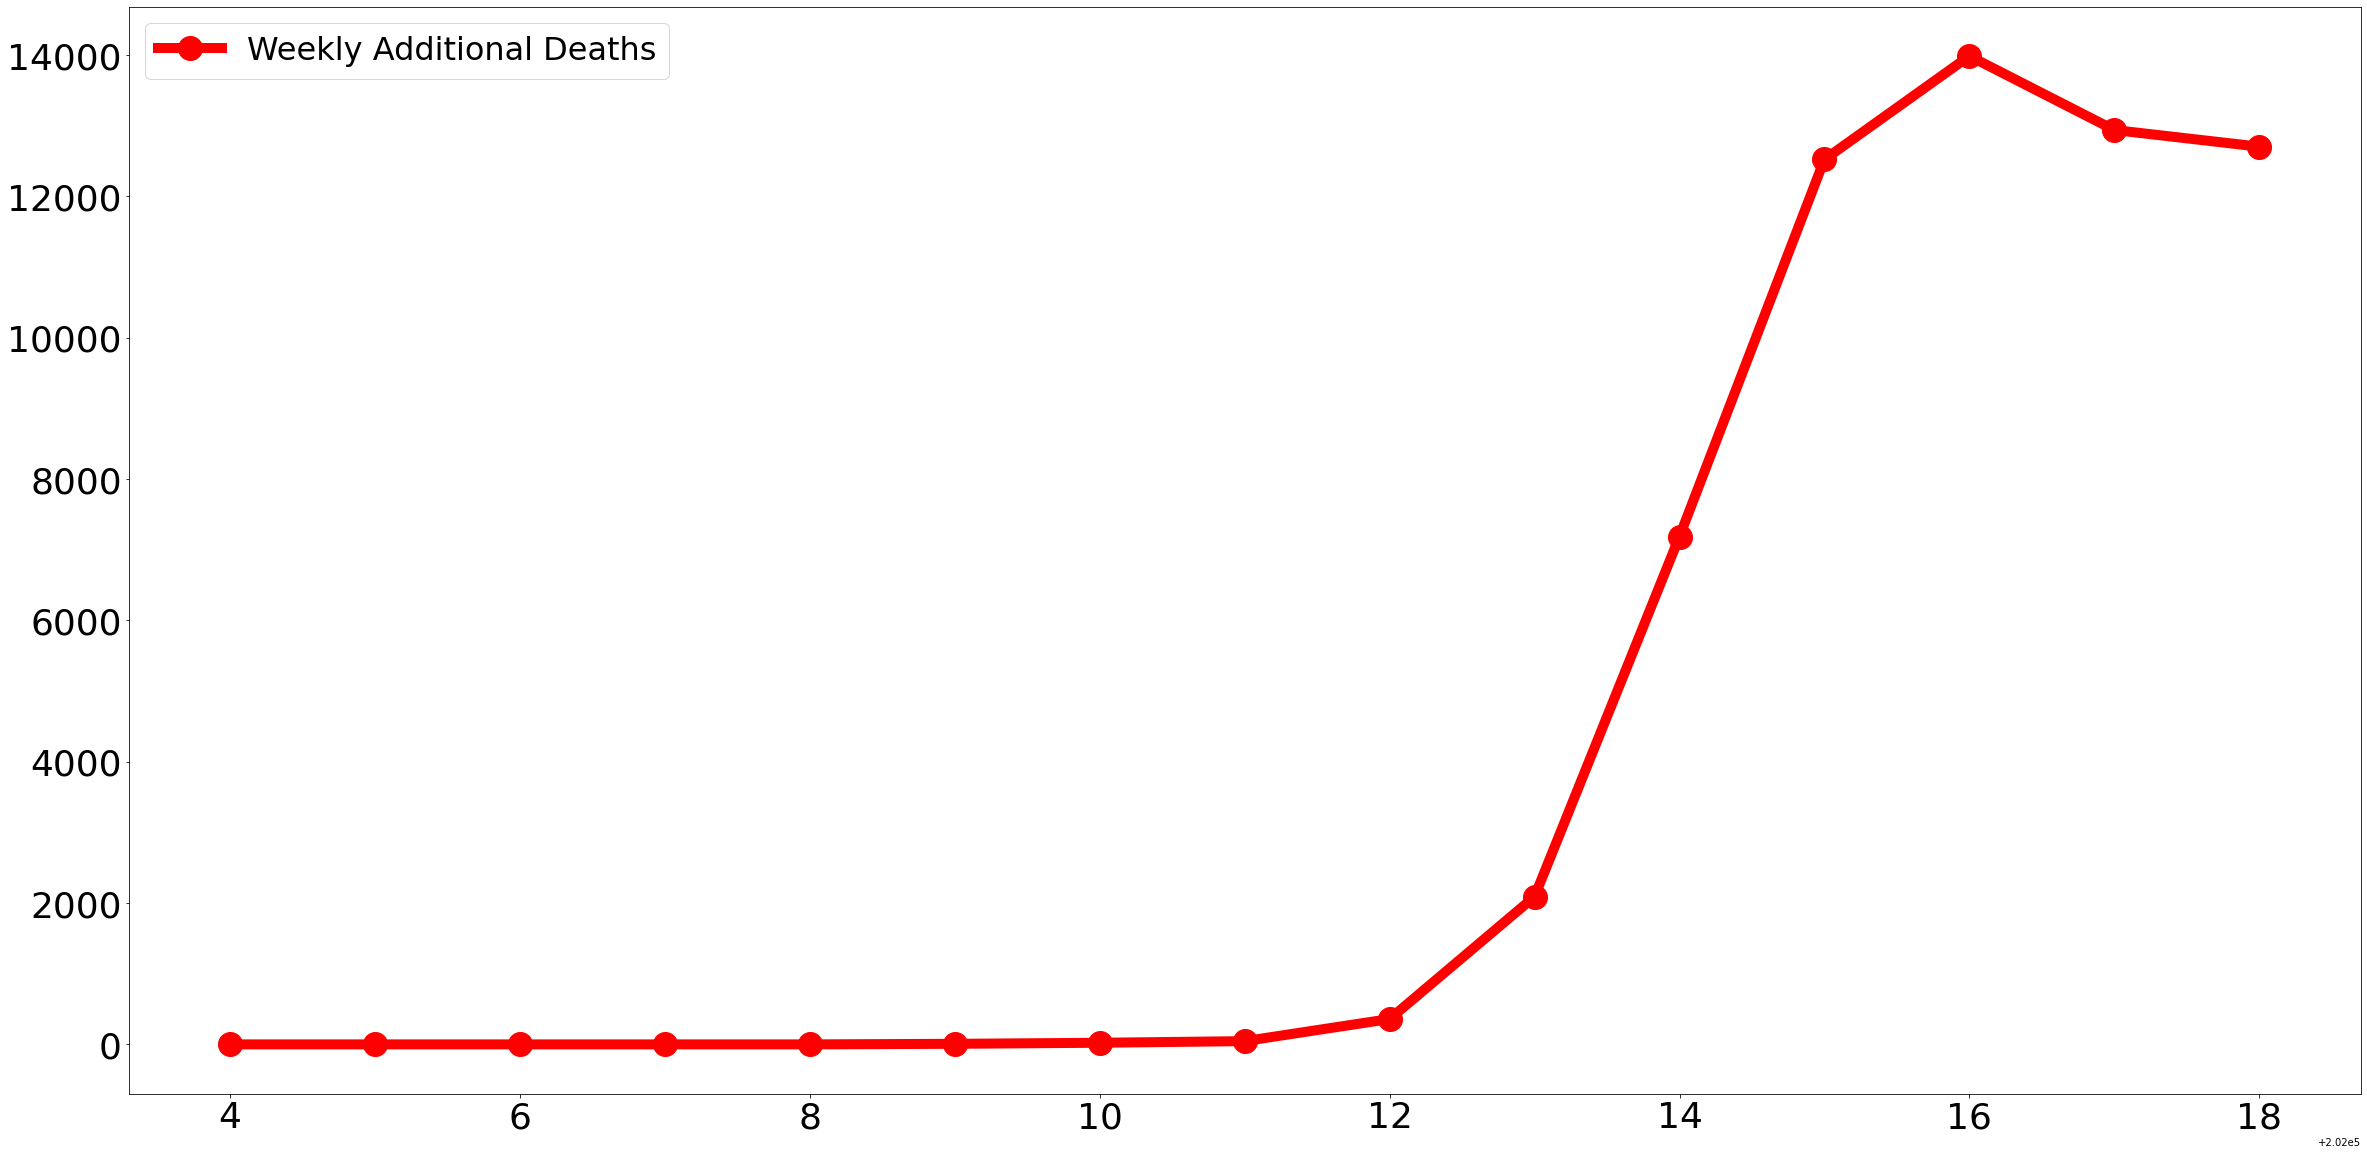

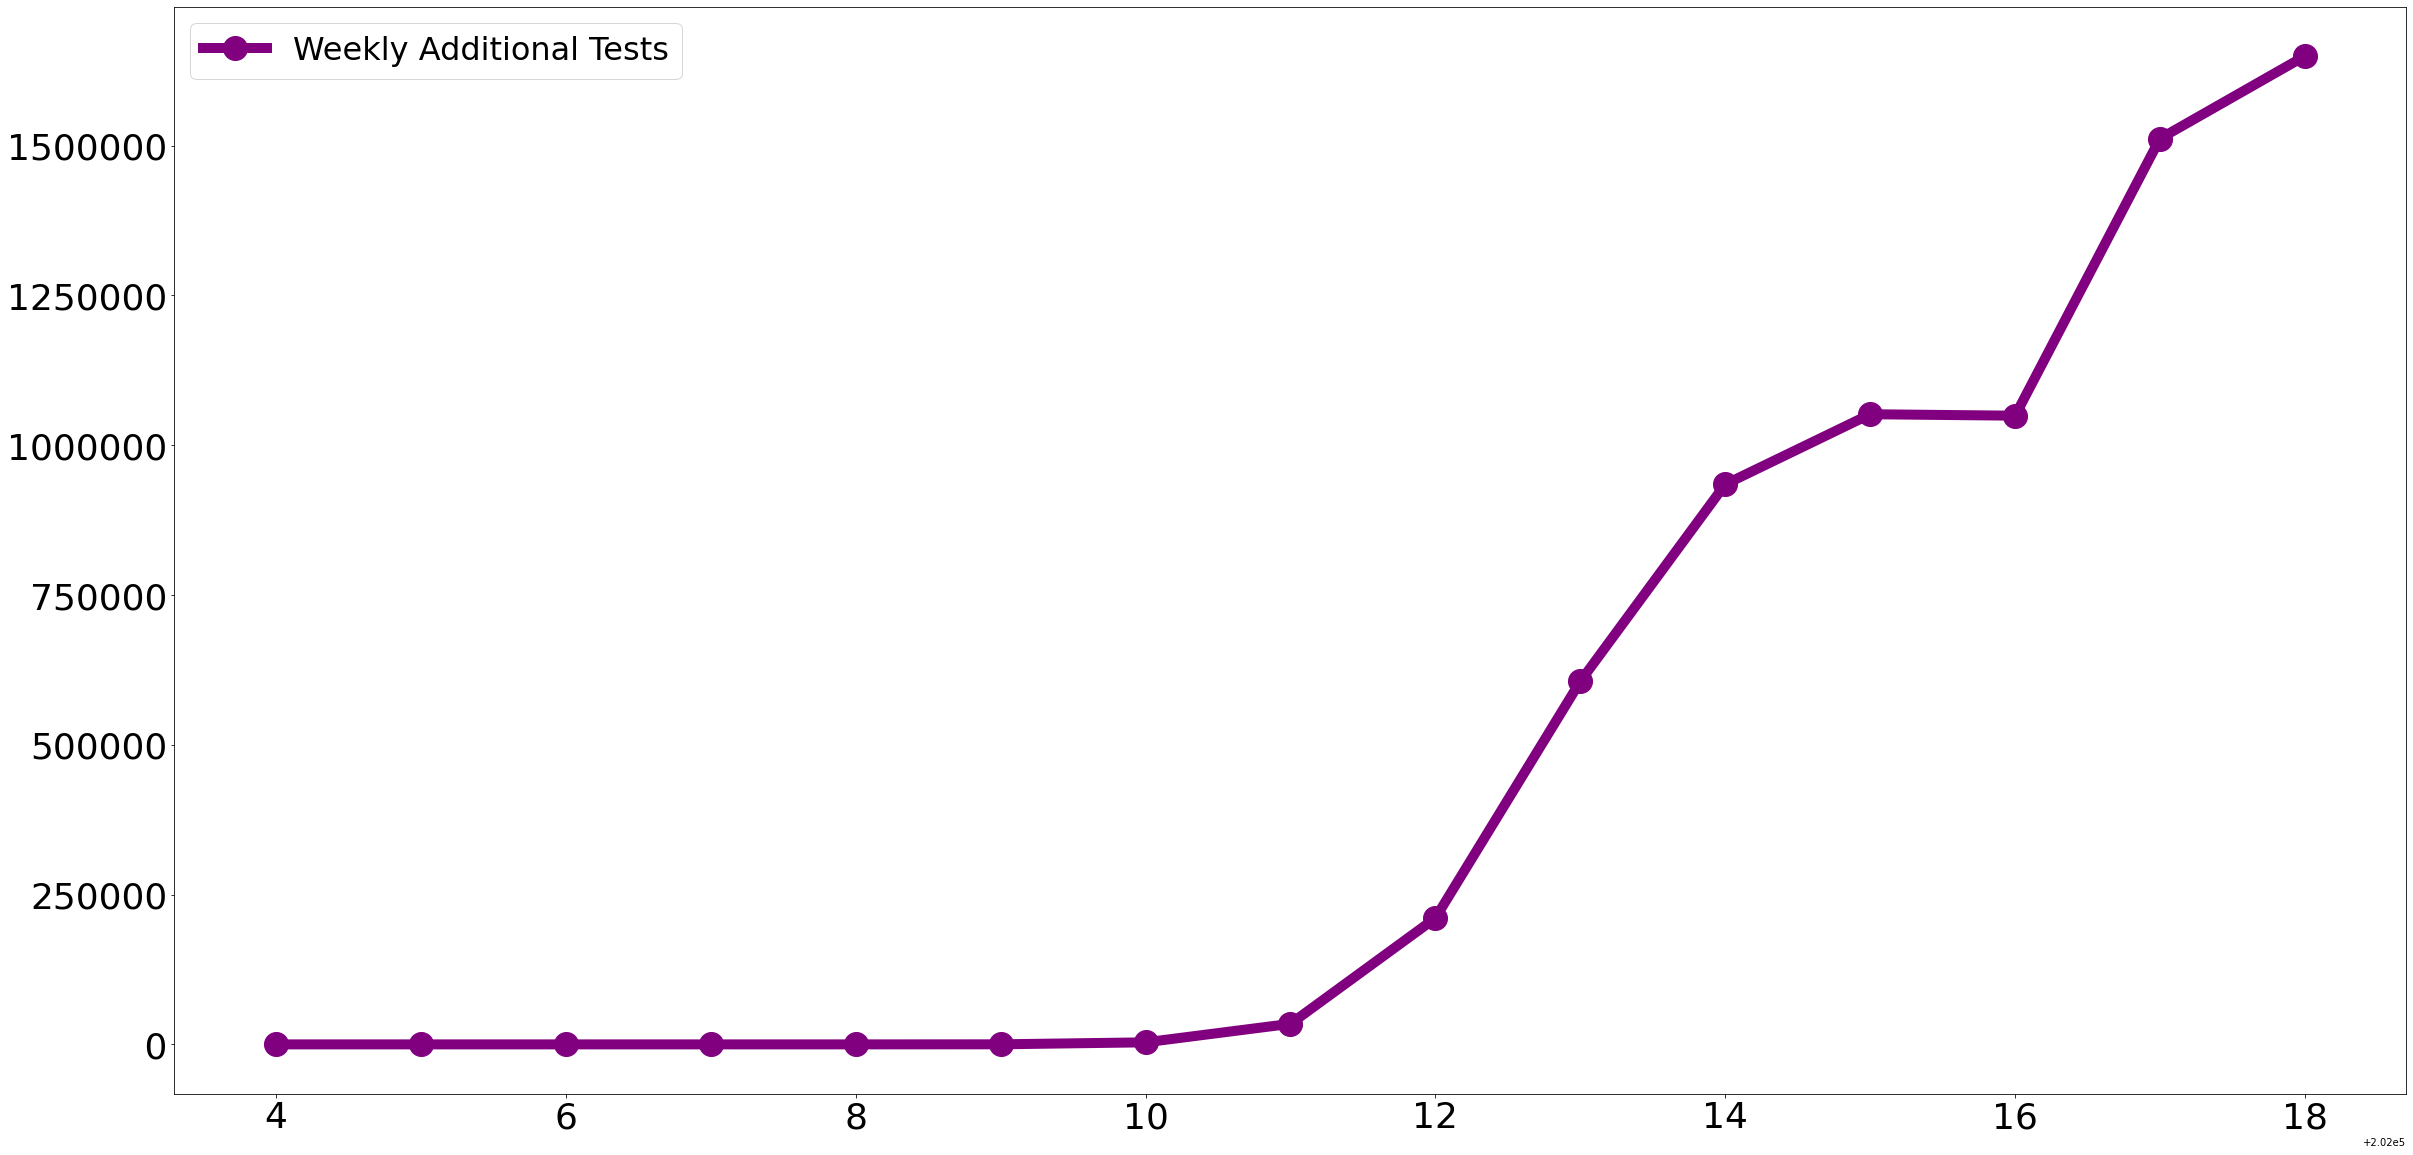

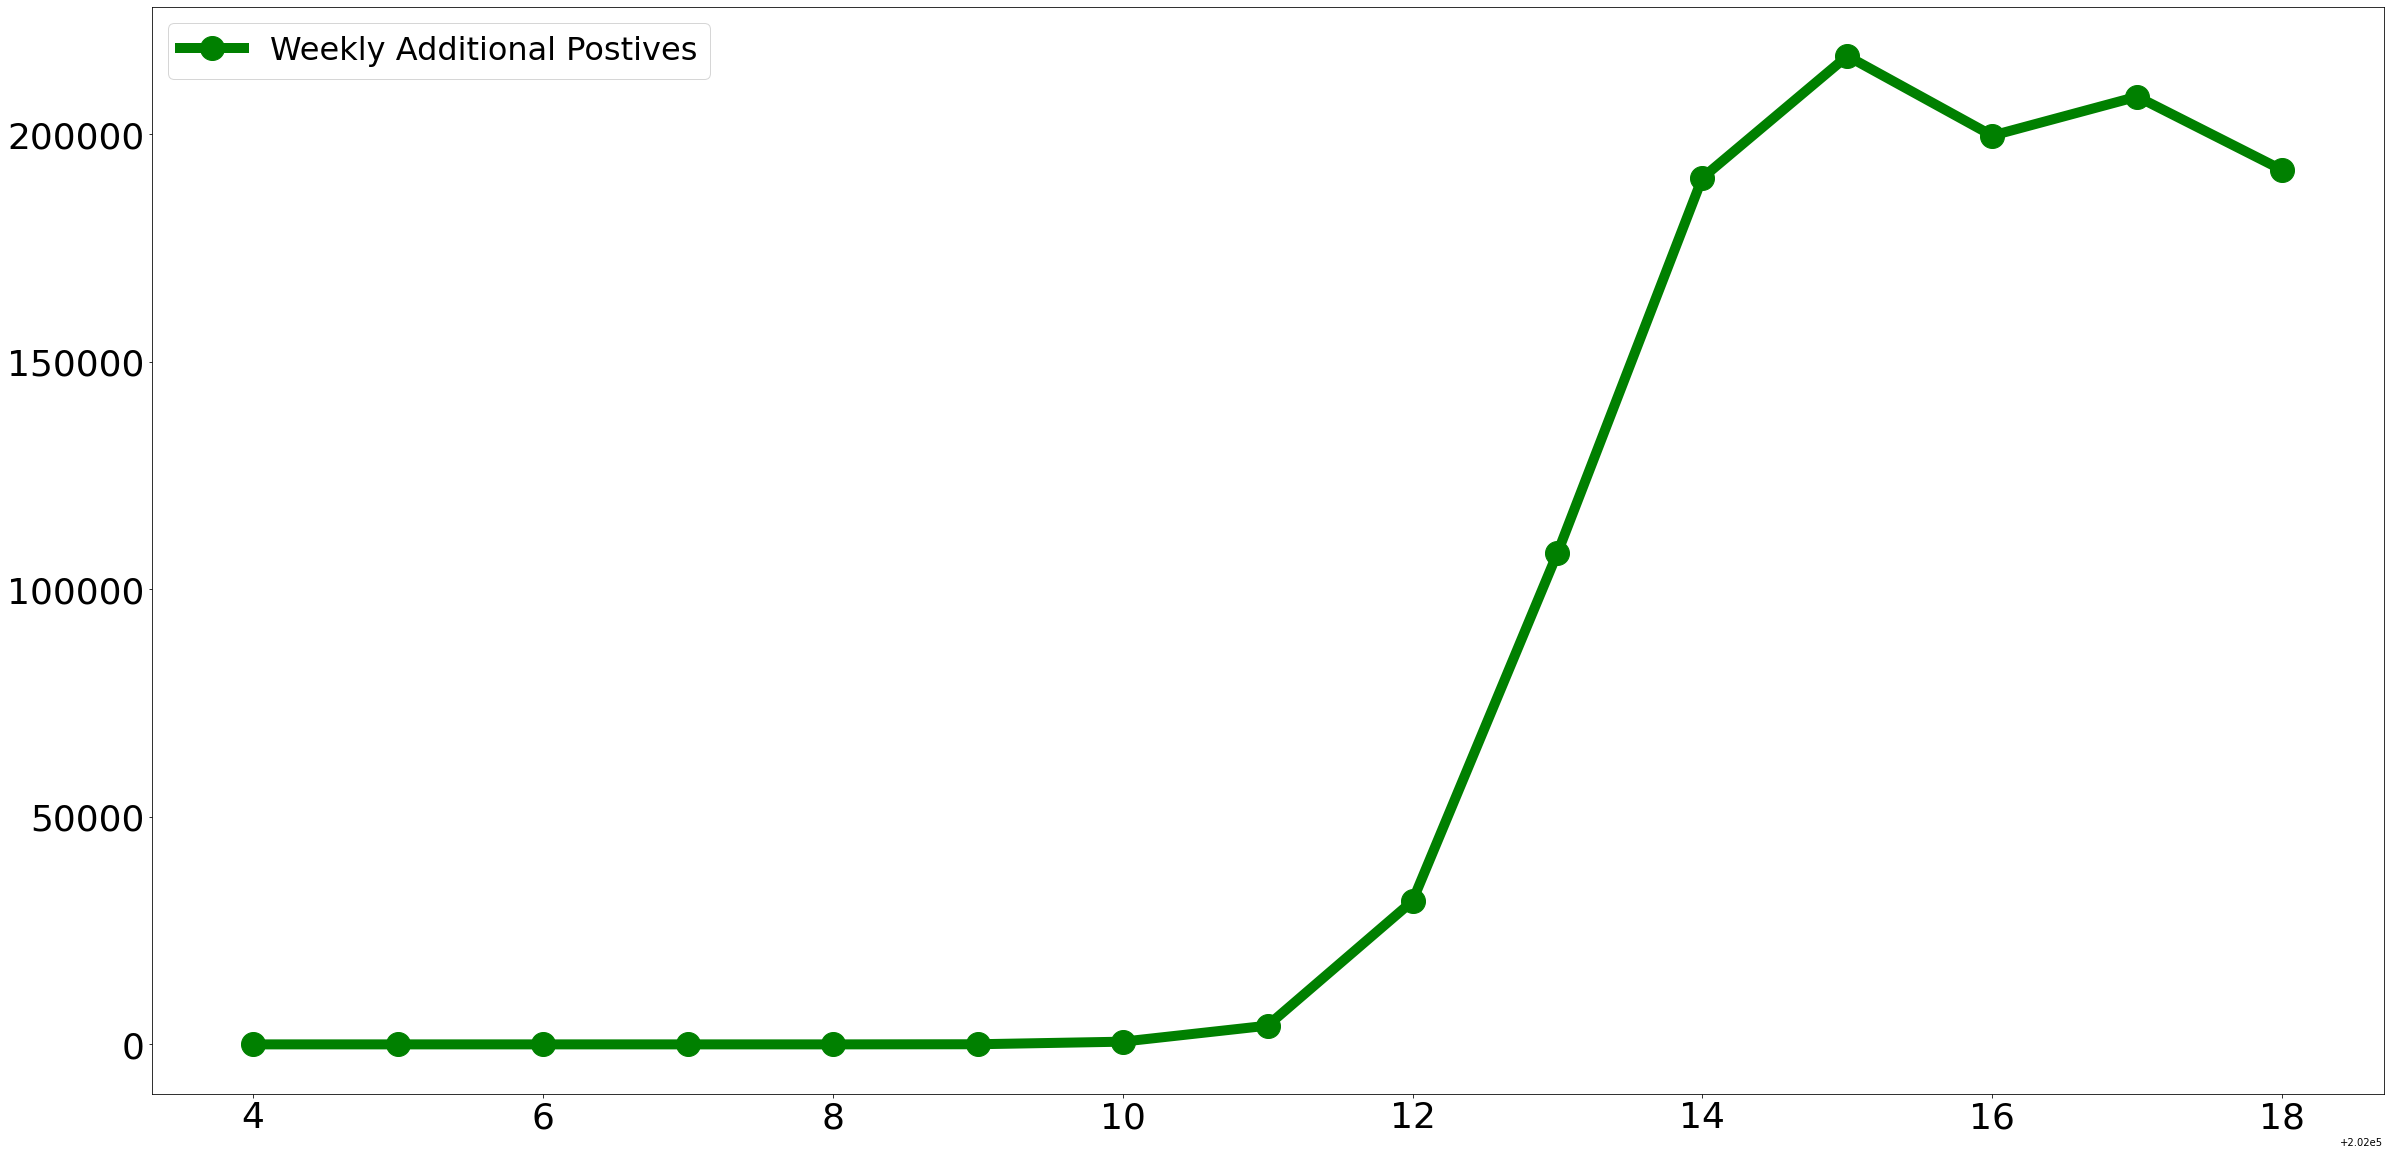

In [173]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

In [174]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,current_total,pct
604,FL,2020-05-05,37439,1536,37439,1.000000
605,FL,2020-05-04,36897,1423,37439,0.985523
606,FL,2020-05-03,36078,1403,37439,0.963648
607,FL,2020-05-02,35463,1388,37439,0.947221
608,FL,2020-05-01,34728,1314,37439,0.927589
609,FL,2020-04-30,33690,1290,37439,0.899864
610,FL,2020-04-29,33193,1240,37439,0.886589
611,FL,2020-04-28,32846,1154,37439,0.877320
612,FL,2020-04-27,32138,1101,37439,0.858410
613,FL,2020-04-26,31528,1094,37439,0.842117


In [175]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=3)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .7)].sort_values(by='pct')


,state,date,positive,death,current_total,pct


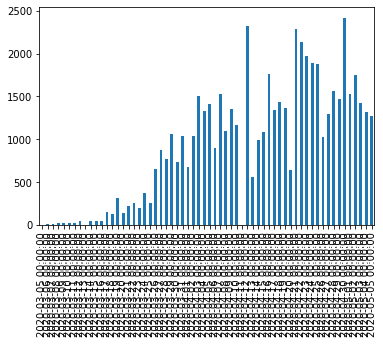

In [176]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [179]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive    1195605
negative    6348723
pending        2633
death         65307
total       7546961
dtype: int64
Current Infection Rate 15.842205%
Percentage of US affected: 0.384144%
Observed CFR: 5.462256%
Percentage of US tested/affected: 2.318318%
Projected affected by cir = 52,000,377
Projected killed = 2,840,394


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [187]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.651070,5.289001
NJ,1.470279,3.238199
MA,1.019528,4.836400
RI,0.937641,7.215199
CT,0.858865,3.047244
DC,0.754092,3.447260
LA,0.645243,4.049029
DE,0.551571,2.534495
IL,0.520541,2.732725


In [188]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 2.298422%


In [189]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [191]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15338 entries, 0 to 15337
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  15147 non-null  object 
 1   location                  15338 non-null  object 
 2   date                      15338 non-null  object 
 3   total_cases               15338 non-null  int64  
 4   new_cases                 15338 non-null  int64  
 5   total_deaths              15338 non-null  int64  
 6   new_deaths                15338 non-null  int64  
 7   total_cases_per_million   15043 non-null  float64
 8   new_cases_per_million     15043 non-null  float64
 9   total_deaths_per_million  15043 non-null  float64
 10  new_deaths_per_million    15043 non-null  float64
 11  total_tests               3922 non-null   float64
 12  new_tests                 3513 non-null   float64
 13  total_tests_per_thousand  3922 non-null   float64
 14  new_te

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [194]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    7285178.0
RUS    4460357.0
DEU    2547052.0
ITA    2246666.0
ESP    1351130.0
         ...    
ZWE      13329.0
PRY      11898.0
CRI       9892.0
MMR       9038.0
BOL       7767.0
Name: total_tests, Length: 82, dtype: float64

In [195]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 26699327
Total tests done in USA : 7285178
How many more times has the world tested more than the US: 3.7


In [196]:
dfOwidLatest[isUSA].sum()

location                                                  United States
date                                                         2020-05-04
total_cases                                                     1158041
new_cases                                                         24972
total_deaths                                                      67682
new_deaths                                                         1297
total_cases_per_million                                         3498.59
new_cases_per_million                                            75.444
total_deaths_per_million                                        204.476
new_deaths_per_million                                            3.918
total_tests                                                 7.28518e+06
new_tests                                                        231812
total_tests_per_thousand                                         22.009
new_tests_per_thousand                                          

In [197]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']
dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-14:]

,new_cases,new_deaths
date,,
2020-04-22,37289,2524
2020-04-23,17588,1721
2020-04-24,26543,3179
2020-04-25,21352,1054
2020-04-26,48529,2172
2020-04-27,26857,1687
2020-04-28,22541,1369
2020-04-29,24132,2110
2020-04-30,27326,2611


In [198]:
dfOwidUSA.set_index('date')

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
date,,,,,,,,,,,,,,,
2019-12-31,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-01,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-02,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-03,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-04,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,USA,United States,1069826,29917,63006,2040,3232.077,90.383,190.349,6.163,6551810.0,296041.0,19.794,0.894,inconsistent units (COVID Tracking Project)
2020-05-02,USA,United States,1103781,33955,65068,2062,3334.659,102.582,196.578,6.230,6805241.0,253431.0,20.559,0.766,inconsistent units (COVID Tracking Project)
2020-05-03,USA,United States,1133069,29288,66385,1317,3423.142,88.483,200.557,3.979,7053366.0,248125.0,21.309,0.750,inconsistent units (COVID Tracking Project)


In [199]:
dfCovidtracking.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-05-05,AK,371,22321,0,13.0,0.0,0.0,0.0,0.0,0.0,277.0,C,5/5/2020 00:00,00204bcdd1828164f28ff336af010befc611be6f,2020-05-05T20:00:00Z,9,0.0,22692,22692,22692,02,0.0,0.0,968.0,1.0,969.0
1,2020-05-05,AL,8285,98481,0,0.0,1107.0,0.0,428.0,0.0,255.0,0.0,B,5/5/2020 00:00,cdeeecd2210217b93fc3b08765445de51e2cebcc,2020-05-05T20:00:00Z,313,1107.0,106766,106766,106766,01,17.0,43.0,3389.0,260.0,3649.0
2,2020-05-05,AR,3496,51139,0,89.0,453.0,0.0,0.0,16.0,89.0,2041.0,B,5/5/2020 16:10,3cc9e3312bd3ccab63c4e8b814a946a97f184370,2020-05-05T20:00:00Z,80,453.0,54635,54635,54635,05,-1.0,15.0,155.0,38.0,193.0
3,2020-05-05,AS,0,83,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,5/3/2020 00:00,f94c558e51e8e65ec0f3cabbacdfc175c6c485e1,2020-05-05T20:00:00Z,0,0.0,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,2020-05-05,AZ,9305,78955,0,728.0,1397.0,303.0,0.0,185.0,0.0,1671.0,A+,5/5/2020 00:00,735adac292a2c990854cd5e5b718e42fe1aa4c45,2020-05-05T20:00:00Z,395,1397.0,88260,88260,88260,04,33.0,40.0,2621.0,386.0,3007.0


In [0]:
dfWeeklyFL = dfCovidtracking.loc[dfCovidtracking.state=='FL'].set_index('date')\
.groupby(by=lambda x: x.week).sum()


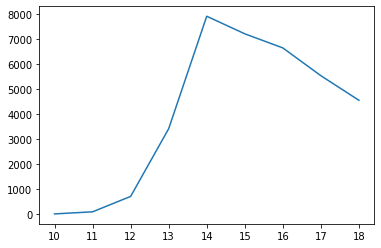

In [201]:
plt = dfWeeklyFL[:-1].positiveIncrease.plot.line()

In [202]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

36897

In [203]:
dfCovidtracking[dfCovidtracking.state=='FL']

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
10,2020-05-05,FL,37439,428252,1265,0.0,6546.0,0.0,0.0,0.0,0.0,0.0,C,5/5/2020 10:31,cc9858355edd3f9217a9161416e34034e40cfd24,2020-05-05T20:00:00Z,1536,6546.0,466956,465691,465691,12,113.0,217.0,20879.0,542.0,21421.0
66,2020-05-04,FL,36897,407373,1181,0.0,6329.0,0.0,0.0,0.0,0.0,0.0,C,5/4/2020 09:12,ab9900a3978e419e37fd28c4c86ff5943dbb92e4,2020-05-04T20:00:00Z,1423,6329.0,445451,444270,444270,12,20.0,85.0,15262.0,819.0,16081.0
122,2020-05-03,FL,36078,392111,1226,0.0,6244.0,0.0,0.0,0.0,0.0,0.0,C,5/2/2020 10:14,b4bbb1861dfd7382b14b352add108a733db9e3c3,2020-05-03T20:00:00Z,1403,6244.0,429415,428189,428189,12,15.0,299.0,11562.0,615.0,12177.0
178,2020-05-02,FL,35463,380549,0,0.0,5945.0,0.0,0.0,0.0,0.0,0.0,C,5/2/2020 10:14,6fef4afbf7bffe883ca0cecf9eb9683715d5781b,2020-05-02T20:00:00Z,1388,5945.0,416012,416012,416012,12,74.0,150.0,12578.0,735.0,13313.0
234,2020-05-01,FL,34728,367971,0,0.0,5795.0,0.0,0.0,0.0,0.0,0.0,C,5/1/2020 14:32,a30019f74e7f74ea7a417b93742901aaf103bb07,2020-05-01T20:00:00Z,1314,5795.0,402699,402699,402699,12,24.0,0.0,19256.0,1038.0,20294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,2020-03-08,FL,17,118,108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,6fe85d0dc53d6860063f38e98dccf29e36f035c3,2020-03-08T20:00:00Z,0,0.0,243,135,135,12,0.0,0.0,18.0,3.0,21.0
3269,2020-03-07,FL,14,100,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,78b1ecd25b46274b2fb969cd705c9ce078f24642,2020-03-07T21:00:00Z,0,0.0,202,114,114,12,0.0,0.0,45.0,5.0,50.0
3317,2020-03-06,FL,9,55,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,6b75ea058687eb6f8643e53e3f75f8739b986534,2020-03-06T21:00:00Z,0,0.0,115,64,64,12,0.0,0.0,24.0,0.0,24.0
3350,2020-03-05,FL,9,31,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,be40a4f79a747d11e86a789e72624d9fb7e87651,2020-03-05T21:00:00Z,0,0.0,109,40,40,12,0.0,0.0,7.0,7.0,14.0


In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [205]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,208.0,715.0,20005.0,3811.0,23816.0
1,355.0,1218.0,39541.0,5795.0,45336.0
2,224.0,1307.0,18778.0,4649.0,23427.0
3,156.0,745.0,20163.0,3789.0,23952.0
4,195.0,868.0,32762.0,5295.0,38057.0
5,90.0,579.0,25740.0,3544.0,29284.0
6,60.0,202.0,14183.0,2826.0,17009.0
